In [1]:
## required imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [68]:
## Read data
df = pd.read_pickle("Combined_Social_Data_Pickle.pkl")

In [69]:
## Date Checks
df.shape
# df.loc[(df['artist_name_x']=='gentedezona') & (df['description'].str.contains('#Repost from @randy_malcom'))][['description', 'artist_name_x']]

(1008733, 43)

1. How many artists of each genre? DONE
    -how does age of artist vary across genre?
    -how does years active of artist vary across
2. How many posts of each genre? DONE
3. How many artists of each genre post on each of 4 platforms? DONE (Explained by Note)
    -How does this vary overtime?
4. What is average of age of artists that post on each of 4 platforms? DONE
5. What time of day do artists of each genre post? DONE
6. How does # of followers differ for each genre? 
7. What types of posts are common for each genre? DONE

In [73]:
## rename genre columns
df.rename({'genre_blues':'Blues', 'genre_country':'Country', 'genre_electronic':'Electronic', 'genre_folk':'Folk',
       'genre_hip_hop':'Hip Hop', 'genre_jazz':'Jazz', 'genre_pop':'Pop', 'genre_r_and_b':'R&B',
       'genre_rock':'Rock', 'genre_spiritual':'Spiritual', 'genre_world_music':'World Music'}, inplace =True)

In [279]:
df.columns

Index(['Facebook', 'Instagram', 'Twitter', 'Youtube', 'age', 'artist_name_x',
       'artist_name_y', 'count_of_followers', 'created', 'created_12am-6am',
       'created_12pm-6pm', 'created_6am-12pm', 'created_6pm-12am',
       'crowdtangle_score', 'description', 'description_length', 'facebook',
       'Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop',
       'R&B', 'Rock', 'Spiritual', 'World Music', 'hashtag_count', 'instagram',
       'posts_last_30days', 'posts_last_7days', 'social_engagement_score',
       'time_since_last_post', 'twitter', 'type_link', 'type_photo',
       'type_text', 'type_video', 'within_month_release',
       'within_week_release', 'years_active', 'youtube', 'social_platform',
       'Social Platform'],
      dtype='object')

In [304]:
## create platform column
df["Social Platform"] =0
df.loc[df['Facebook'] == 1, 'Social Platform'] = 'Facebook'
df.loc[df['Instagram'] == 1, 'Social Platform'] = 'Instagram'
df.loc[df['Twitter'] == 1, 'Social Platform'] = 'Twitter'
df.loc[df['Youtube'] == 1, 'Social Platform'] = 'Youtube'

In [305]:
## create Time Range of Post Creation column
df["Time Range of Post Creation"] = 0
df.loc[df['created_12am-6am'] == 1, 'Time Range of Post Creation'] = '12am-6am'
df.loc[df['created_12pm-6pm'] == 1, 'Time Range of Post Creation'] = '12pm-6pm'
df.loc[df['created_6am-12pm'] == 1, 'Time Range of Post Creation'] = '6am-12pm'
df.loc[df['created_6pm-12am'] == 1, 'Time Range of Post Creation'] = '6pm-12am'

In [349]:
## setting type of Youtube rows due to issue, will remove once issue is fixed
df.loc[df['Youtube'] == 1, 'type_video'] = 1                                  

In [350]:
## create Post Type column
df["Post Type"] = 0
df.loc[df['type_link'] == 1, 'Type of Post'] = 'Link'
df.loc[df['type_photo'] == 1, 'Type of Post'] = 'Photo'
df.loc[df['type_text'] == 1, 'Type of Post'] = 'Text'
df.loc[df['type_video'] == 1, 'Type of Post'] = 'Video'

In [403]:
## converted created to datetime
df['created'] = pd.to_datetime(df['created'])

Note 1: 61 artists have 2 genres, others have 1 genre
Note 2: All artists post on all platforms (except 7 artists who don't have Youtube posts)


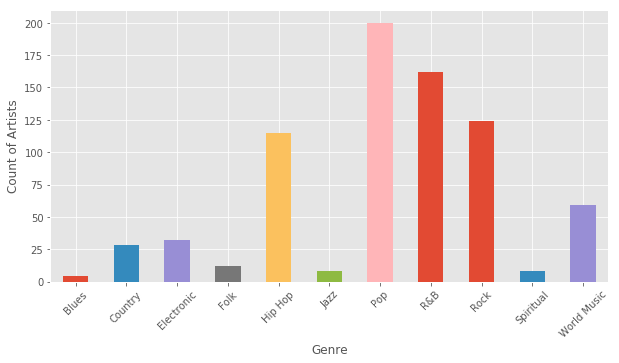

In [406]:
## Count of artists in each genre
genres = ['Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']
df_artist_genre = df[['artist_name_y', 'age', 'years_active', 'Social Platform', 'Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']].drop_duplicates()
df_artist_genre_plot = df_artist_genre[genres].sum()

print("Note 1: 61 artists have 2 genres, others have 1 genre")
print("Note 2: All artists post on all platforms (except 7 artists who don't have Youtube posts)")

ax = df_artist_genre_plot.plot.bar(rot=45,  figsize=(10,5))
ax.set_xlabel("Genre")
ax.set_ylabel("Count of Artists")
plt.show()
      

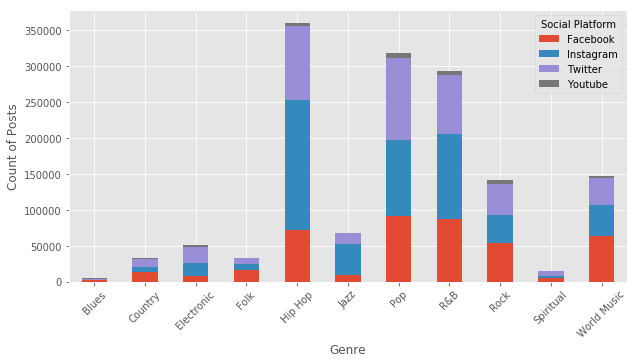

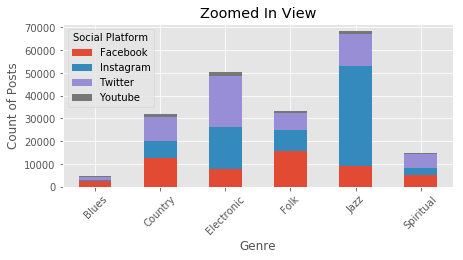

In [407]:
## Count of posts on each platform of each genre
genres = ['Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']
df_posts_genre_platform = df[['created', 'Social Platform', 'Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']]

## plot with platform breakdown:
df_posts_genre_platform = df_posts_genre_platform.groupby('Social Platform')[genres].sum()
df_posts_genre_platform_plot = df_posts_genre_platform.T
ax = df_posts_genre_platform_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
ax.set_xlabel("Genre")
ax.set_ylabel("Count of Posts")

## plot with platform breakdown zoomed in:
genres_zoomedin = ['Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Spiritual']
df_posts_genre_zoomedin_platform = df[['created', 'Social Platform', 'Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Spiritual']]
df_posts_genre_zoomedin_platform = df_posts_genre_zoomedin.groupby('Social Platform')[genres_zoomedin].sum()
df_posts_genre_zoomedin_platform_plot = df_posts_genre_zoomedin_platform.T
ax1 = df_posts_genre_zoomedin_platform_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(7,3))
ax1.set_title("Zoomed In View")
ax1.set_xlabel("Genre")
ax1.set_ylabel("Count of Posts")

plt.show()



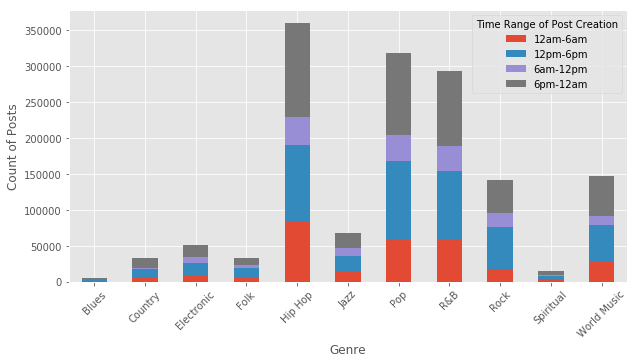

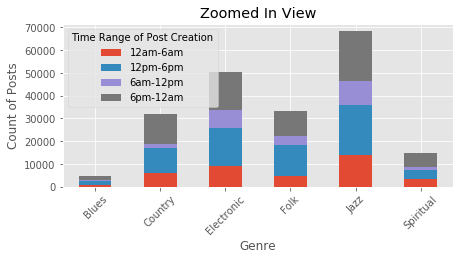

In [354]:
## Count of posts in each time range of each genre
df_posts_genre_timerange = df[['created', 'Time Range of Post Creation', 'Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']]

## plot with time range of post creation breakdown:
df_posts_genre_timerange = df_posts_genre_timerange.groupby('Time Range of Post Creation')[genres].sum()
df_posts_genre_timerange_plot = df_posts_genre_timerange.T
ax = df_posts_genre_timerange_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
ax.set_xlabel("Genre")
ax.set_ylabel("Count of Posts")

## plot with time range of post creation breakdown zoomed in:
df_posts_genre_zoomedin_timerange = df[['created', 'Time Range of Post Creation', 'Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Spiritual']]
df_posts_genre_zoomedin_timerange = df_posts_genre_zoomedin_timerange.groupby('Time Range of Post Creation')[genres_zoomedin].sum()
df_posts_genre_zoomedin_timerange_plot = df_posts_genre_zoomedin_timerange.T
ax1 = df_posts_genre_zoomedin_timerange_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(7,3))
ax1.set_title("Zoomed In View")
ax1.set_xlabel("Genre")
ax1.set_ylabel("Count of Posts")

plt.show()

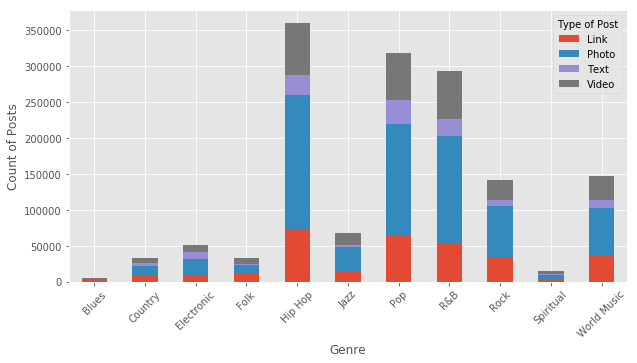

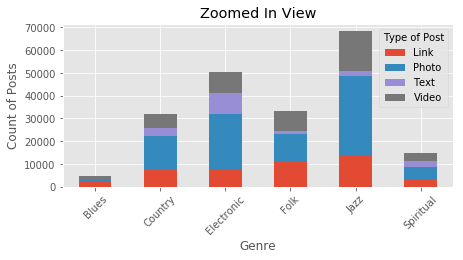

In [408]:
## Count of posts of each type in each genre
df_posts_genre_posttype = df[['created', 'Type of Post', 'Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']]

## plot with time range of post creation breakdown:
df_posts_genre_posttype = df_posts_genre_posttype.groupby('Type of Post')[genres].sum()
df_posts_genre_posttype_plot = df_posts_genre_posttype.T
ax = df_posts_genre_posttype_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(10,5))
ax.set_xlabel("Genre")
ax.set_ylabel("Count of Posts")

## plot with posts of each type breakdown zoomed in:
df_posts_genre_zoomedin_posttype = df[['created', 'Type of Post', 'Blues', 'Country', 'Electronic', 'Folk', 'Jazz', 'Spiritual']]
df_posts_genre_zoomedin_posttype = df_posts_genre_zoomedin_posttype.groupby('Type of Post')[genres_zoomedin].sum()
df_posts_genre_zoomedin_posttype_plot = df_posts_genre_zoomedin_posttype.T
ax1 = df_posts_genre_zoomedin_posttype_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(7,3))
ax1.set_title("Zoomed In View")
ax1.set_xlabel("Genre")
ax1.set_ylabel("Count of Posts")

plt.show()

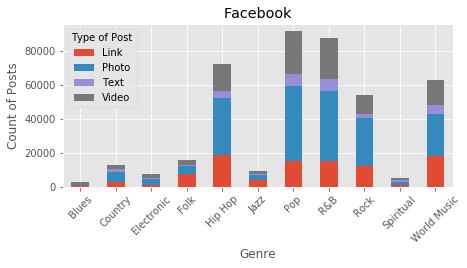

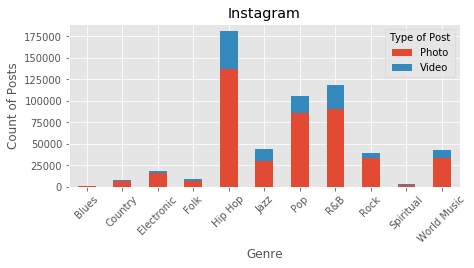

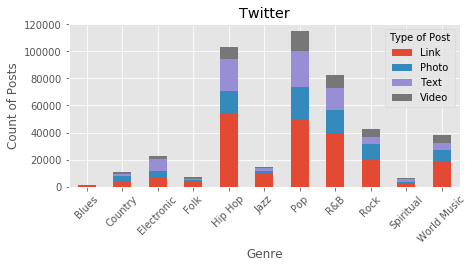

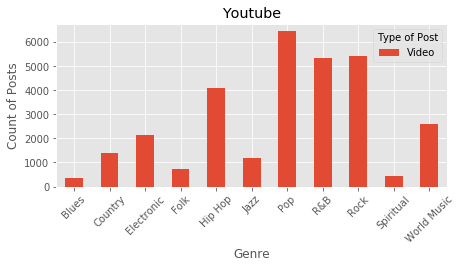

In [409]:
## Count of posts of each type in each genre on each platform
df_posts_genre_posttype_byplatform = df[['created', 'Social Platform', 'Type of Post', 'Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']]
df_posts_genre_posttype_byplatform_FB = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Facebook']
df_posts_genre_posttype_byplatform_Instagram = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Instagram']
df_posts_genre_posttype_byplatform_Twitter = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Twitter']
df_posts_genre_posttype_byplatform_Youtube = df_posts_genre_posttype_byplatform[df_posts_genre_posttype_byplatform['Social Platform']=='Youtube']

platform_dfs = [df_posts_genre_posttype_byplatform_FB, df_posts_genre_posttype_byplatform_Instagram, df_posts_genre_posttype_byplatform_Twitter, df_posts_genre_posttype_byplatform_Youtube]
platform_names = ['Facebook', 'Instagram', 'Twitter', 'Youtube']
for i in range(len(platform_dfs)):
    platform_dfs[i] = platform_dfs[i].groupby('Type of Post')[genres].sum()
    d_plot = platform_dfs[i].T
    ax = d_plot.plot(kind='bar', stacked=True, rot=45,  figsize=(7,3))
    ax.set_xlabel("Genre")
    ax.set_ylabel("Count of Posts")
    ax.set_title(platform_names[i])
    plt.show()

    

In [410]:
# df_posts_genre_posttype_byplatform_Youtube

In [411]:
## average age of artists that post on each platform
df_artists_age_platforms = df.groupby(['Social Platform'])['age'].mean()
print("Average age of artists that post an a platform is almost equal for every platform")
df_artists_age_platforms

Average age of artists that post an a platform is almost equal for every platform


Social Platform
Facebook     41.095422
Instagram    38.300106
Twitter      39.184630
Youtube      42.667629
Name: age, dtype: float64

In [412]:
## average count of followers of artists that post on each platform
df_artists_age_platforms = df.groupby(['Social Platform'])['count_of_followers'].mean().reset_index()
df_artists_age_platforms['count_of_followers'] = df_artists_age_platforms.apply(lambda x: "{:,.0f}".format(x['count_of_followers']), axis=1)
print("Average Count of Followers of artists that post on each platform")
df_artists_age_platforms

Average Count of Followers of artists that post on each platform


,Social Platform,count_of_followers
0,Facebook,"11,705,765"
1,Instagram,"8,036,545"
2,Twitter,"5,435,430"
3,Youtube,0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


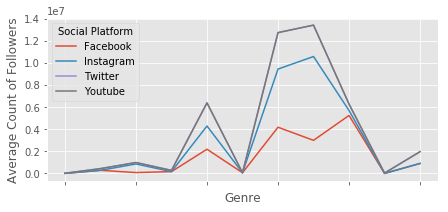

In [427]:
## Average number of followers of artists in each genre on each platform
df_artist_genre_followers_byplatform = df[['artist_name_y', 'created','Social Platform', 'count_of_followers', 'Blues', 'Country', 'Electronic', 'Folk', 'Hip Hop', 'Jazz', 'Pop', 'R&B', 'Rock', 'Spiritual', 'World Music']].drop_duplicates()

idx = df_artist_genre_followers_byplatform.groupby(['artist_name_y'])['created'].transform(max) == df_artist_genre_followers_byplatform['created']
df_artist_genre_followers_byplatform_latest = df_artist_genre_followers_byplatform[idx]
for column in genres:
        df_artist_genre_followers_byplatform_latest[column] = df_artist_genre_followers_byplatform_latest['count_of_followers']*df_artist_genre_followers_byplatform_latest[column]
        

df_posts_genre_followers_byplatform_latest_mean = df_artist_genre_followers_byplatform_latest.groupby('Social Platform')[genres].mean()
df_posts_genre_followers_byplatform_latest_mean_plot = df_posts_genre_followers_byplatform_latest_mean.T
ax1 = df_posts_genre_followers_byplatform_latest_mean_plot.plot(kind='line', stacked=True, rot=45,  figsize=(7,3))
ax1.set_xlabel("Genre")
ax1.set_ylabel("Average Count of Followers")

plt.show()
    

In [420]:
# df_artist_genre_followers_byplatform[df_artist_genre_followers_byplatform['Social Platform']=='Twitter']
df_posts_genre_followers_byplatform_latest_mean

,Blues,Country,Electronic,Folk,Hip Hop,Jazz,Pop,R&B,Rock,Spiritual,World Music
Social Platform,,,,,,,,,,,
Facebook,0.000000,277276.411765,74563.558824,158673.176471,2.184658e+06,58427.911765,4.174242e+06,2.987202e+06,5.242579e+06,0.000000,8.970320e+05
Instagram,0.000000,0.000000,777853.785714,0.000000,2.100340e+06,0.000000,5.259242e+06,7.582709e+06,4.461324e+05,0.000000,0.000000e+00
Twitter,10037.283582,154057.716418,128650.552239,111338.805970,2.092788e+06,0.000000,3.298050e+06,2.838142e+06,5.802717e+05,26532.014925,1.066908e+06
Youtube,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
